In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:80% !important;}
</style>
"""))

<font size=6>tensorflow v1으로 머신러닝</font>

# version1 in version2

In [3]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() #버전1로 사용 가능

Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
node1 = tf.constant('Hello, tensorflow') #node1 tensor 선언
sess = tf.Session()#computational graph 생성

In [7]:
print(sess.run(node1)) #b가 의미하는 것은 byte literals
print(sess.run(node1).decode())

b'Hello, tensorflow'
Hello, tensorflow


In [8]:
#간단한 수학 연산
node1 = tf.constant(10,dtype=tf.float32)
node2 = tf.constant(20,dtype=tf.float32)
node3 = tf.add(node1, node2)
sess = tf.Session()
print(sess.run(node3))

30.0


In [10]:
import numpy as np
node1 = tf.constant(np.array([1,2,3]), dtype=tf.int16)
node2 = tf.cast(node1, dtype=tf.float32)#형변환
sess = tf.Session()
print(sess.run(node1))
print(sess.run(node2))

[1 2 3]
[1. 2. 3.]


In [11]:
data = [1.,2.,3.,4.]
m = tf.reduce_mean(data) #평균이 m에 지정
sess = tf.Session()
print(sess.run(m))

2.5


# 독립변수 x 1개 linear regression

In [13]:
#tensor graph 정의
x = np.array([1,2,3])
y = np.array([1,2,3])
#weight and bias 처음엔 랜덤값, 학습과정에서 변경
W = tf.Variable(tf.random.normal([1]), name="weight")
b = tf.Variable(tf.random.normal([1]), name="bias")
#hypothesis
H = W*x + b
#cost function
cost = tf.reduce_mean(tf.square(H - y))
#cost function의 최소가 되는 W와 b를 찾는 것, 미분값이 줄어드는 방향으로 학습
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
sess = tf.Session()
# variable 노드 초기화
sess.run(tf.global_variables_initializer())
#학습
# for step in range(1,6001):
#     sess.run(train)
#     if step%300==0:
#         print("{}번째 cost: {} W: {} b: {}".format(step, sess.run(cost), sess.run(W), sess.run(b)))
for step in range(1,6001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b])
    if step%200==0:
         print("{}번째 cost: {} W: {} b: {}".format(step, cost_val, W_val, b_val))

200번째 cost: 0.016343308612704277 W: [0.85187757] b: [0.33671707]
400번째 cost: 0.006240683142095804 W: [0.90846926] b: [0.20807074]
600번째 cost: 0.002382993698120117 W: [0.94343966] b: [0.12857498]
800번째 cost: 0.0009099412709474564 W: [0.96504915] b: [0.07945146]
1000번째 cost: 0.0003474610857665539 W: [0.97840244] b: [0.04909621]
1200번째 cost: 0.00013267796020954847 W: [0.98665404] b: [0.03033852]
1400번째 cost: 5.06628530274611e-05 W: [0.991753] b: [0.0187474]
1600번째 cost: 1.9346194676472805e-05 W: [0.9949038] b: [0.01158482]
1800번째 cost: 7.387048754026182e-06 W: [0.9968509] b: [0.00715865]
2000번째 cost: 2.8206220576976193e-06 W: [0.9980541] b: [0.00442361]
2200번째 cost: 1.0772131417979836e-06 W: [0.9987975] b: [0.00273367]
2400번째 cost: 4.114689033940522e-07 W: [0.99925673] b: [0.0016895]
2600번째 cost: 1.571881682593812e-07 W: [0.9995406] b: [0.00104434]
2800번째 cost: 6.012581366121594e-08 W: [0.9997159] b: [0.00064581]
3000번째 cost: 2.3016227146399615e-08 W: [0.99982405] b: [0.00039957]
3200번째 c

In [15]:
W_, b_ = sess.run([W, b])
print("최종회귀식: H = {}*x +{}".format(W_[0], b_[0]))

최종회귀식: H = 0.9999977350234985*x +4.490227638598299e-06


## predict를 하기 위한 placeholder 이용

In [20]:
#placeholder 이용
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
ab = tf.add(a,b)
sess = tf.Session()
sess.run(ab, feed_dict={a:10, b:20})

30.0

In [22]:
sess.run(ab, feed_dict={a:np.array([1,2,3]), b:np.array([10,10,10])})

array([11., 12., 13.], dtype=float32)

In [23]:
#그래프 실행 단계에서 값을 부여
node1 = tf.placeholder(tf.float32)
node2 = tf.placeholder(tf.float32)
adder_node = node1 + node2
sess = tf.Session()
result = sess.run(adder_node, feed_dict={node1:input("node1:"), node2:input("node2:")})
print(result)

node1:10
node2:20
30.0


In [24]:
#training dataset
x_data = [1,2,3]
y_data = [5,7,9]
#placeholder
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
#weight and bias
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")
#hypothesis
H = W*x + b
#cost function
cost = tf.reduce_mean(tf.square(H - y))
#최소 제곱법
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
#Session and cost 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
#training
for step in range(1,6001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], feed_dict={x:x_data, y:y_data})
    if step%200 ==0:
        print("{}번째 cost: {} W: {} b: {}".format(step, cost_val, W_val, b_val))

200번째 cost: 0.23167556524276733 W: [2.557687] b: [1.7322456]
400번째 cost: 0.08846525102853775 W: [2.3446174] b: [2.2166042]
600번째 cost: 0.03378048539161682 W: [2.2129529] b: [2.5159085]
800번째 cost: 0.012898977845907211 W: [2.131592] b: [2.7008607]
1000번째 cost: 0.004925495479255915 W: [2.0813158] b: [2.8151495]
1200번째 cost: 0.0018808040767908096 W: [2.0502484] b: [2.8857737]
1400번째 cost: 0.0007181937689892948 W: [2.0310504] b: [2.9294147]
1600번째 cost: 0.00027424594736658037 W: [2.0191875] b: [2.9563823]
1800번째 cost: 0.00010471924906596541 W: [2.0118568] b: [2.9730463]
2000번째 cost: 3.998479587608017e-05 W: [2.0073266] b: [2.983345]
2200번째 cost: 1.5271349184331484e-05 W: [2.0045278] b: [2.9897075]
2400번째 cost: 5.833402155985823e-06 W: [2.0027983] b: [2.993639]
2600번째 cost: 2.230151721960283e-06 W: [2.00173] b: [2.996067]
2800번째 cost: 8.534155426787038e-07 W: [2.0010707] b: [2.9975672]
3000번째 cost: 3.272016328992322e-07 W: [2.0006623] b: [2.9984934]
3200번째 cost: 1.2560576578835025e-07 W: [2

In [25]:
sess.run([W, b])

[array([2.000026], dtype=float32), array([2.999942], dtype=float32)]

In [26]:
sess.run(H, feed_dict={x:5})

array([13.000072], dtype=float32)

In [27]:
sess.run(H, feed_dict={x:np.array([1,10,20])})

array([ 4.999968, 23.000202, 43.00046 ], dtype=float32)

## scale이 다른 데이터들의 linear regression

In [29]:
#training dataset
x_data = [1,2,5,8,10]
y_data = [5,15,68,80,95]
#placeholder
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
#weight and bias
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")
#hypothesis
H = W*x + b
#cost function
cost = tf.reduce_mean(tf.square(H - y))
#최소 제곱법
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
#Session and cost 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
#training
for step in range(1,6001):
    _, cost_val, W_val = sess.run([train, cost, W], feed_dict={x:x_data, y:y_data})
    if step%200 ==0:
        print("{}번째 cost: {} W: {}".format(step, cost_val, W_val))

200번째 cost: 79.17362976074219 W: [10.114777]
400번째 cost: 79.14259338378906 W: [10.146208]
600번째 cost: 79.13973236083984 W: [10.155728]
800번째 cost: 79.13945770263672 W: [10.158611]
1000번째 cost: 79.13947296142578 W: [10.159484]
1200번째 cost: 79.13946533203125 W: [10.159749]
1400번째 cost: 79.13945770263672 W: [10.159829]
1600번째 cost: 79.13947296142578 W: [10.159853]
1800번째 cost: 79.13944244384766 W: [10.159861]
2000번째 cost: 79.13947296142578 W: [10.159862]
2200번째 cost: 79.13945770263672 W: [10.1598625]
2400번째 cost: 79.13945770263672 W: [10.1598625]
2600번째 cost: 79.13945770263672 W: [10.1598625]
2800번째 cost: 79.13945770263672 W: [10.1598625]
3000번째 cost: 79.13945770263672 W: [10.1598625]
3200번째 cost: 79.13945770263672 W: [10.1598625]
3400번째 cost: 79.13945770263672 W: [10.1598625]
3600번째 cost: 79.13945770263672 W: [10.1598625]
3800번째 cost: 79.13945770263672 W: [10.1598625]
4000번째 cost: 79.13945770263672 W: [10.1598625]
4200번째 cost: 79.13945770263672 W: [10.1598625]
4400번째 cost: 79.13945770263

In [32]:
sess.run([W,b]) #cost가 크기 때문에 신뢰도가 낮음 > GradientDescentOptimizer에서 global 최소값이 있음에도 local최소값을 만나면 정지

[array([10.1598625], dtype=float32), array([-0.23128414], dtype=float32)]

# 독립변수 x가 여러개인 linear regression
- scale이 다른 x, y

In [40]:
#training dataset
x_data = np.array([[73,80,75],
                   [93,88,93],
                   [89,91,90],
                   [96,98,100],
                   [73,66,70]])
y_data = np.array([[152],
                   [185],
                   [180],
                   [196],
                   [142]])

# placeholder 
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([3,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis
# H = X @ W + b
H = tf.matmul(X, W) + b

# cost function
cost = tf.reduce_mean(tf.square(H - Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

# session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 60001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, 
                                                    Y : y_data})
    if step%3000 == 0 :
        print("{}번째 cost:{}".format(step, cost_val))

3000번째 cost:9.136207580566406
6000번째 cost:3.114727020263672
9000번째 cost:1.7729883193969727
12000번째 cost:1.373133897781372
15000번째 cost:1.1770305633544922
18000번째 cost:1.036899209022522
21000번째 cost:0.9215200543403625
24000번째 cost:0.8229076266288757
27000번째 cost:0.7378987073898315
30000번째 cost:0.6644306778907776
33000번째 cost:0.6009332537651062
36000번째 cost:0.5460286140441895
39000번째 cost:0.49854740500450134
42000번째 cost:0.4575120806694031
45000번째 cost:0.4220268130302429
48000번째 cost:0.3913397490978241
51000번째 cost:0.36480456590652466
54000번째 cost:0.34186112880706787
57000번째 cost:0.3220188021659851
60000번째 cost:0.3048604428768158


## 오존량 예측 예제
- multi variable linear regression

In [41]:
import tensorflow.compat.v1 as tf
import numpy as np
import pandas as pd
tf.disable_v2_behavior()

In [51]:
#training data set 생성
#data load > 결측치 처리 > 독립변수, 종속변수 분리
data = pd.read_csv('data/ozone.csv',sep=',')
data = data.dropna(how='any')#한 열이라도 결측치이면 제거

data = data.iloc[:,:4]#독립변수
x_data = data.iloc[:,1:].values # 데이터프레임을 numpy 배열로 변경
y_data = data.iloc[:,0].values.reshape(-1,1)
x_data.shape, y_data.shape

# placeholder 
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([3,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis
# H = X @ W + b
H = tf.matmul(X, W) + b

# cost function
cost = tf.reduce_mean(tf.square(H - Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

# session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 60001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, 
                                                    Y : y_data})
    if step%3000 == 0 :
        print("{}번째 cost:{}".format(step, cost_val))

3000번째 cost:504.8381652832031
6000번째 cost:468.85931396484375
9000번째 cost:464.62042236328125
12000번째 cost:464.0985107421875
15000번째 cost:464.0119934082031
18000번째 cost:463.97650146484375
21000번째 cost:463.9469299316406
24000번째 cost:463.918212890625
27000번째 cost:463.88946533203125
30000번째 cost:463.86077880859375
33000번째 cost:463.83221435546875
36000번째 cost:463.8035888671875
39000번째 cost:463.7749938964844
42000번째 cost:463.7464599609375
45000번째 cost:463.7179870605469
48000번째 cost:463.6894836425781
51000번째 cost:463.6609802246094
54000번째 cost:463.6324462890625
57000번째 cost:463.6040344238281
60000번째 cost:463.5757751464844


In [52]:
sess.run(H, feed_dict={X:np.array([[118,8,72]])})

array([[41.55091]], dtype=float32)

In [ ]:
#scale을 맞추는 방법: normalization, standardization

In [53]:
# scale 맞추는 방법 : normalization(많이 씀), standardization(표준화)
#                   X - Xmin
# normalization = ──────────────
#                  Xmax - Xmin
#       위의 식을 써도 되지만 라이브러리를 씀(sklearn 이용)
#                    x - Xmean(평균)
# standardization = ────────────────
#                     Xstd(표준편차)

In [54]:
#training data set 생성
#data load > 결측치 처리 > 독립변수, 종속변수 분리
data = pd.read_csv('data/ozone.csv',sep=',')
data = data.dropna(how='any')#한 열이라도 결측치이면 제거

#scale 조정
data['Ozone'] = (data['Ozone'] - data['Ozone'].mean()) / data['Ozone'].std()
data['Solar.R'] = (data['Solar.R'] - data['Solar.R'].mean()) / data['Solar.R'].std()
data['Wind'] = (data['Wind'] - data['Wind'].mean()) / data['Wind'].std()
data['Temp'] = (data['Temp'] - data['Temp'].mean()) / data['Temp'].std()

data = data[['Ozone','Solar.R','Wind','Temp']]#독립변수
x_data = data[['Solar.R','Wind','Temp']].values # 데이터프레임을 numpy 배열로 변경
y_data = data[['Ozone']].values.reshape(-1,1)
x_data.shape, y_data.shape

# placeholder 
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([3,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis
# H = X @ W + b
H = tf.matmul(X, W) + b

# cost function
cost = tf.reduce_mean(tf.square(H - Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

# session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 60001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, 
                                                    Y : y_data})
    if step%3000 == 0 :
        print("{}번째 cost:{}".format(step, cost_val))

3000번째 cost:5.826967716217041
6000번째 cost:4.9516754150390625
9000번째 cost:4.2251811027526855
12000번째 cost:3.6216273307800293
15000번째 cost:3.1197047233581543
18000번째 cost:2.701829433441162
21000번째 cost:2.3534936904907227
24000번째 cost:2.062731981277466
27000번째 cost:1.8196581602096558
30000번째 cost:1.6161142587661743
33000번째 cost:1.445363998413086
36000번째 cost:1.301838755607605
39000번째 cost:1.180937647819519
42000번째 cost:1.0788547992706299
45000번째 cost:0.9924433827400208
48000번째 cost:0.9190965890884399
51000번째 cost:0.8566592931747437
54000번째 cost:0.8033410310745239
57000번째 cost:0.757660448551178
60000번째 cost:0.7183879017829895


In [57]:
#training data set 생성
#data load > 결측치 처리 > 독립변수, 종속변수 분리
data = pd.read_csv('data/ozone.csv',sep=',')
data = data.dropna(how='any')#한 열이라도 결측치이면 제거
data = data[['Ozone','Solar.R','Wind','Temp']]#독립변수

x_data = data[['Solar.R','Wind','Temp']].values # 데이터프레임을 numpy 배열로 변경
y_data = data[['Ozone']].values.reshape(-1,1)

#scale 조정(sklearn.preprocessing.minmaxscaler)
from sklearn.preprocessing import MinMaxScaler
scale_x = MinMaxScaler() #scale조정할 객체
scale_x.fit(x_data)
x_data = scale_x.transform(x_data)
scale_y = MinMaxScaler() #scale조정할 객체
scale_y.fit(y_data)
y_data = scale_y.transform(y_data)

# placeholder 
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([3,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis
# H = X @ W + b
H = tf.matmul(X, W) + b

# cost function
cost = tf.reduce_mean(tf.square(H - Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

# session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 60001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, Y : y_data})
    if step%3000 == 0 :
        print("{}번째 cost:{}".format(step, cost_val))

3000번째 cost:2.0159056186676025
6000번째 cost:1.6541839838027954
9000번째 cost:1.3613395690917969
12000번째 cost:1.1242868900299072
15000번째 cost:0.9323583245277405
18000번째 cost:0.7769467234611511
21000번째 cost:0.6510868072509766
24000번째 cost:0.549145519733429
27000번째 cost:0.46656063199043274
30000번째 cost:0.3996536433696747
33000번째 cost:0.34540820121765137
36000번째 cost:0.3014566898345947
39000번째 cost:0.26578348875045776
42000번째 cost:0.2368483692407608
45000번째 cost:0.21333491802215576
48000번째 cost:0.19422826170921326
51000번째 cost:0.17868785560131073
54000번째 cost:0.1660429686307907
57000번째 cost:0.1557280272245407
60000번째 cost:0.14729328453540802


In [58]:
#predict
input_data = np.array([[118.,8.,72.]])
scale_input = scale_x.transform(input_data)
predict_value = sess.run(H, feed_dict={X:scale_input})
scale_y.inverse_transform(predict_value)

array([[60.7895]], dtype=float32)

In [61]:
# training data set 생성
# data load -> 결측치 처리 -> 독립변수, 종속변수 분리
data = pd.read_csv('./data/ozone.csv', sep=",")

# data를 바로 학습할 수 없음. 데이터 정제 작업 필요.
data = data.dropna(how='any') # 결측치가 한열이라도 있는 행 모두 제거

# 필요한 columns만 추출
data = data[['Ozone','Solar.R','Wind','Temp']]

# scale 조정 : data를 한꺼번에 scale 조정 시 prediction 힘듦
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(data)
# data = pd.DataFrame(scaler.transform(data),
#                     columns=['Ozone','Solar.R','Wind','Temp'])

# training data set
x_data = data[['Solar.R','Wind','Temp']].values # DataFrame을 numpy 배열로
y_data = data[['Ozone']].values.reshape(-1, 1)

print('조정전\n', np.c_[x_data[:2], y_data[:2]])
# scale 조정 : x_data, y_data scale을 따로 따로 - prediction 가능
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_x.fit(x_data)
x_data = scaler_x.transform(x_data)

scaler_y = StandardScaler()
scaler_y.fit(y_data)
y_data = scaler_y.transform(y_data)
print('조정후\n', np.c_[x_data[:2], y_data[:2]])

# tensorflow 구현
# 1.placeholder
X = tf.placeholder(shape=[None,3], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# 2. Weight & bias 설정
W = tf.Variable(tf.random_normal([3,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# 3. Hypothesis
# H = X @ W + b
H = tf.matmul(X, W) + b

# 4. cost 함수
cost = tf.reduce_mean(tf.square(H - Y))

# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

# 6. session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 7. 학습
for step in range(1, 60001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data,
                                                    Y:y_data})
    if step%3000 == 0:
        print("{:5d}번째 cost {}".format(step, cost_val))

조정전
 [[190.    7.4  67.   41. ]
 [118.    8.   72.   36. ]]
조정후
 [[ 0.05728624 -0.71707784 -1.13764691 -0.03317961]
 [-0.73618283 -0.54766534 -0.61060682 -0.18411965]]
 3000번째 cost 7.2879638671875
 6000번째 cost 6.246420860290527
 9000번째 cost 5.371882915496826
12000번째 cost 4.636427402496338
15000번째 cost 4.0169358253479
18000번째 cost 3.494255542755127
21000번째 cost 3.052475690841675
24000번째 cost 2.6784169673919678
27000번째 cost 2.361098289489746
30000번째 cost 2.091405153274536
33000번째 cost 1.8617397546768188
36000번째 cost 1.665771722793579
39000번째 cost 1.4982167482376099
42000번째 cost 1.3546617031097412
45000번째 cost 1.2314139604568481
48000번째 cost 1.1253849267959595
51000번째 cost 1.0339773893356323
54000번째 cost 0.9550122618675232
57000번째 cost 0.886655867099762
60000번째 cost 0.8273625373840332


In [62]:
sess.run([W, b])

[array([[-0.5015641 ],
        [-0.38921705],
        [ 0.4891389 ]], dtype=float32),
 array([-0.02001625], dtype=float32)]

In [63]:
input_data = np.array([[118.,8.,72.]])
scaled_input_data = scale_x.transform(input_data)
scaler_y.inverse_transform(sess.run(H, feed_dict={X:scaled_input_data}))

array([[50.834877]], dtype=float32)

# logistic regression = binary classification

w  0.12925170068027214  b  lm[1]


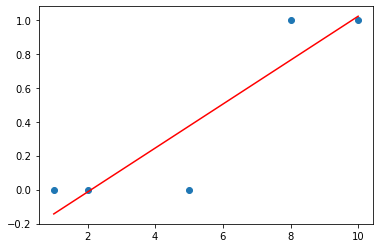

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

x=np.array([1,2,5,8,10])
y=np.array([0,0,0,1,1])
lm = stats.linregress(x,y)
print('w ',lm[0],' b ','lm[1]')
plt.scatter(x,y)
plt.plot(x, lm[0]*x + lm[1], 'r')

# multinomial classification